# Import Data

In [67]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('user_segmentation.csv')

# Display the first 10 rows
df.head(10)


,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,...,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,attributes_patterns,POS_all,cluster
0,157603005,english,fun game to play when you've had a long day an...,1707077354,1707077354,True,0,0,0.0,0,...,76561199401546423,0,1,2027,322,1986,1707079884,"['long day', 'fun easy', 'easy game']","['fun', 'game', 'play', ""'ve"", 'had', 'long', ...",1
1,157602265,english,pros:\nanimals\nparty\nfunny mechanics\na bunc...,1707076676,1707076676,True,0,0,0.0,0,...,76561198056822321,0,2,316,316,316,1707076353,"['party funny', 'funny mechanics', 'short whil...","['pros', 'animals', 'party', 'funny', 'mechani...",1
2,157598111,english,10/10 would drop kick a cat without feeling bad,1707072837,1707072837,True,0,1,0.0,0,...,76561198428748427,0,1,847,410,804,1707075660,[],"['drop', 'kick', 'cat', 'feeling', 'bad']",1
3,157592673,english,"very fun game. the animals are very cute, the ...",1707068019,1707068019,True,0,0,0.0,0,...,76561197987140501,0,10,7864,600,7712,1707109536,"['fun game', 'new skins/characters']","['very', 'fun', 'game', 'animals', 'are', 'ver...",0
4,157588222,english,game has been out for 4 months and they only a...,1707064205,1707064205,False,0,0,0.0,0,...,76561198024864749,375,17,1456,0,1456,1701029993,"['new content', 'old level', 'social hub']","['game', 'has', 'been', 'months', 'only', 'add...",1
5,157571234,english,"i wanted a silly game, i got that.\ni wanted s...",1707049256,1707049256,True,0,1,0.0,0,...,76561198186335569,85,31,77,77,46,1707116433,"['silly game', 'non gamers', 'free pass']","['i', 'wanted', 'silly', 'game', 'i', 'got', '...",1
6,157560216,english,amazing!!! at first i could not punch but i ev...,1707038018,1707038018,True,0,0,0.0,0,...,76561199554790429,0,1,302,302,302,1707007872,"['first i', 'same problem']","['amazing', 'first', 'i', 'not', 'punch', 'i',...",1
7,157554594,english,it's just super fun. i love pvpin friends,1707030713,1707030713,True,0,0,0.0,0,...,76561199503158814,0,1,3482,1295,3316,1707116694,['super fun'],"[""'s"", 'just', 'super', 'fun', 'i', 'love', 'p...",0
8,157545950,english,it is so fun to play with friends and even wit...,1707019575,1707019575,True,0,0,0.0,0,...,76561199616500100,11,1,358,358,318,1707081153,[],"['is', 'so', 'fun', 'play', 'friends', 'even',...",1
9,157539476,english,"good game, despite all the controversy",1707011714,1707011714,True,0,0,0.0,0,...,76561197984794794,0,4,423,21,423,1707011693,['good game'],"['good', 'game', 'controversy']",1


## Make sure lowercased all words except header

In [68]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

/var/folders/tr/psvn_y8x0w34ssccnb237zq00000gn/T/ipykernel_3719/2340421553.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


# Sentiment Analysis on Nouns POS with Vader

In [69]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis Nouns POS 
df['sentiment_scores_noun_pos_vader'] = df['attributes_patterns'].apply(lambda x: sia.polarity_scores(x))
df['sentiment_score_noun_pos_vader'] = df['sentiment_scores_noun_pos_vader'].apply(lambda x: x['compound'])

df.head(10)

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,...,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,attributes_patterns,POS_all,cluster,sentiment_scores_noun_pos_vader,sentiment_score_noun_pos_vader
0,157603005,english,fun game to play when you've had a long day an...,1707077354,1707077354,True,0,0,0.0,0,...,1,2027,322,1986,1707079884,"['long day', 'fun easy', 'easy game']","['fun', 'game', 'play', ""'ve"", 'had', 'long', ...",1,"{'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'comp...",0.7351
1,157602265,english,pros:\nanimals\nparty\nfunny mechanics\na bunc...,1707076676,1707076676,True,0,0,0.0,0,...,2,316,316,316,1707076353,"['party funny', 'funny mechanics', 'short whil...","['pros', 'animals', 'party', 'funny', 'mechani...",1,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.4404
2,157598111,english,10/10 would drop kick a cat without feeling bad,1707072837,1707072837,True,0,1,0.0,0,...,1,847,410,804,1707075660,[],"['drop', 'kick', 'cat', 'feeling', 'bad']",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,157592673,english,"very fun game. the animals are very cute, the ...",1707068019,1707068019,True,0,0,0.0,0,...,10,7864,600,7712,1707109536,"['fun game', 'new skins/characters']","['very', 'fun', 'game', 'animals', 'are', 'ver...",0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,157588222,english,game has been out for 4 months and they only a...,1707064205,1707064205,False,0,0,0.0,0,...,17,1456,0,1456,1701029993,"['new content', 'old level', 'social hub']","['game', 'has', 'been', 'months', 'only', 'add...",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
5,157571234,english,"i wanted a silly game, i got that.\ni wanted s...",1707049256,1707049256,True,0,1,0.0,0,...,31,77,77,46,1707116433,"['silly game', 'non gamers', 'free pass']","['i', 'wanted', 'silly', 'game', 'i', 'got', '...",1,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...",0.5106
6,157560216,english,amazing!!! at first i could not punch but i ev...,1707038018,1707038018,True,0,0,0.0,0,...,1,302,302,302,1707007872,"['first i', 'same problem']","['amazing', 'first', 'i', 'not', 'punch', 'i',...",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
7,157554594,english,it's just super fun. i love pvpin friends,1707030713,1707030713,True,0,0,0.0,0,...,1,3482,1295,3316,1707116694,['super fun'],"[""'s"", 'just', 'super', 'fun', 'i', 'love', 'p...",0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
8,157545950,english,it is so fun to play with friends and even wit...,1707019575,1707019575,True,0,0,0.0,0,...,1,358,358,318,1707081153,[],"['is', 'so', 'fun', 'play', 'friends', 'even',...",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
9,157539476,english,"good game, despite all the controversy",1707011714,1707011714,True,0,0,0.0,0,...,4,423,21,423,1707011693,['good game'],"['good', 'game', 'controversy']",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


# Sentiment Analysis on All POS with Vader

In [70]:
# Perform sentiment analysis All POS, including Nouns, Verbs, Adjectives, Adverbs, etc. 
df['sentiment_scores_all_pos_vader'] = df['POS_all'].apply(lambda x: sia.polarity_scores(x))
df['sentiment_score_all_pos_vader'] = df['sentiment_scores_all_pos_vader'].apply(lambda x: x['compound'])

df.head(10)

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,...,playtime_last_two_weeks,playtime_at_review,last_played,attributes_patterns,POS_all,cluster,sentiment_scores_noun_pos_vader,sentiment_score_noun_pos_vader,sentiment_scores_all_pos_vader,sentiment_score_all_pos_vader
0,157603005,english,fun game to play when you've had a long day an...,1707077354,1707077354,True,0,0,0.0,0,...,322,1986,1707079884,"['long day', 'fun easy', 'easy game']","['fun', 'game', 'play', ""'ve"", 'had', 'long', ...",1,"{'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'comp...",0.7351,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
1,157602265,english,pros:\nanimals\nparty\nfunny mechanics\na bunc...,1707076676,1707076676,True,0,0,0.0,0,...,316,316,1707076353,"['party funny', 'funny mechanics', 'short whil...","['pros', 'animals', 'party', 'funny', 'mechani...",1,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.4404,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
2,157598111,english,10/10 would drop kick a cat without feeling bad,1707072837,1707072837,True,0,1,0.0,0,...,410,804,1707075660,[],"['drop', 'kick', 'cat', 'feeling', 'bad']",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
3,157592673,english,"very fun game. the animals are very cute, the ...",1707068019,1707068019,True,0,0,0.0,0,...,600,7712,1707109536,"['fun game', 'new skins/characters']","['very', 'fun', 'game', 'animals', 'are', 'ver...",0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
4,157588222,english,game has been out for 4 months and they only a...,1707064205,1707064205,False,0,0,0.0,0,...,0,1456,1701029993,"['new content', 'old level', 'social hub']","['game', 'has', 'been', 'months', 'only', 'add...",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
5,157571234,english,"i wanted a silly game, i got that.\ni wanted s...",1707049256,1707049256,True,0,1,0.0,0,...,77,46,1707116433,"['silly game', 'non gamers', 'free pass']","['i', 'wanted', 'silly', 'game', 'i', 'got', '...",1,"{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'comp...",0.5106,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
6,157560216,english,amazing!!! at first i could not punch but i ev...,1707038018,1707038018,True,0,0,0.0,0,...,302,302,1707007872,"['first i', 'same problem']","['amazing', 'first', 'i', 'not', 'punch', 'i',...",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
7,157554594,english,it's just super fun. i love pvpin friends,1707030713,1707030713,True,0,0,0.0,0,...,1295,3316,1707116694,['super fun'],"[""'s"", 'just', 'super', 'fun', 'i', 'love', 'p...",0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
8,157545950,english,it is so fun to play with friends and even wit...,1707019575,1707019575,True,0,0,0.0,0,...,358,318,1707081153,[],"['is', 'so', 'fun', 'play', 'friends', 'even',...",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
9,157539476,english,"good game, despite all the controversy",1707011714,1707011714,True,0,0,0.0,0,...,21,423,1707011693,['good game'],"['good', 'game', 'controversy']",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0


# Sentiment Analysis on Entire Review with SpaCy

In [71]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

# Add the SpaCyTextBlob component to the pipeline
nlp.add_pipe('spacytextblob')

# Perform sentiment analysis on the "review" column
df['sentiment_score_review_spacy'] = df['review'].apply(lambda x: nlp(str(x))._.polarity)

df.head()




,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,...,playtime_at_review,last_played,attributes_patterns,POS_all,cluster,sentiment_scores_noun_pos_vader,sentiment_score_noun_pos_vader,sentiment_scores_all_pos_vader,sentiment_score_all_pos_vader,sentiment_score_review_spacy
0,157603005,english,fun game to play when you've had a long day an...,1707077354,1707077354,True,0,0,0.0,0,...,1986,1707079884,"['long day', 'fun easy', 'easy game']","['fun', 'game', 'play', ""'ve"", 'had', 'long', ...",1,"{'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'comp...",0.7351,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.031481
1,157602265,english,pros:\nanimals\nparty\nfunny mechanics\na bunc...,1707076676,1707076676,True,0,0,0.0,0,...,316,1707076353,"['party funny', 'funny mechanics', 'short whil...","['pros', 'animals', 'party', 'funny', 'mechani...",1,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.4404,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,-0.000231
2,157598111,english,10/10 would drop kick a cat without feeling bad,1707072837,1707072837,True,0,1,0.0,0,...,804,1707075660,[],"['drop', 'kick', 'cat', 'feeling', 'bad']",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,-0.700000
3,157592673,english,"very fun game. the animals are very cute, the ...",1707068019,1707068019,True,0,0,0.0,0,...,7712,1707109536,"['fun game', 'new skins/characters']","['very', 'fun', 'game', 'animals', 'are', 'ver...",0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.218052
4,157588222,english,game has been out for 4 months and they only a...,1707064205,1707064205,False,0,0,0.0,0,...,1456,1701029993,"['new content', 'old level', 'social hub']","['game', 'has', 'been', 'months', 'only', 'add...",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,-0.116856


# Sentiment Analysis on Nouns POS with SpaCy

In [72]:
# Perform sentiment analysis on the "attributes_patterns" column
df['sentiment_score_noun_pos_spacy'] = df['attributes_patterns'].apply(lambda x: nlp(str(x))._.polarity)

df.head()

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,...,last_played,attributes_patterns,POS_all,cluster,sentiment_scores_noun_pos_vader,sentiment_score_noun_pos_vader,sentiment_scores_all_pos_vader,sentiment_score_all_pos_vader,sentiment_score_review_spacy,sentiment_score_noun_pos_spacy
0,157603005,english,fun game to play when you've had a long day an...,1707077354,1707077354,True,0,0,0.0,0,...,1707079884,"['long day', 'fun easy', 'easy game']","['fun', 'game', 'play', ""'ve"", 'had', 'long', ...",1,"{'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'comp...",0.7351,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.031481,0.143333
1,157602265,english,pros:\nanimals\nparty\nfunny mechanics\na bunc...,1707076676,1707076676,True,0,0,0.0,0,...,1707076353,"['party funny', 'funny mechanics', 'short whil...","['pros', 'animals', 'party', 'funny', 'mechani...",1,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.4404,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,-0.000231,0.166667
2,157598111,english,10/10 would drop kick a cat without feeling bad,1707072837,1707072837,True,0,1,0.0,0,...,1707075660,[],"['drop', 'kick', 'cat', 'feeling', 'bad']",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,-0.700000,0.000000
3,157592673,english,"very fun game. the animals are very cute, the ...",1707068019,1707068019,True,0,0,0.0,0,...,1707109536,"['fun game', 'new skins/characters']","['very', 'fun', 'game', 'animals', 'are', 'ver...",0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.218052,0.012121
4,157588222,english,game has been out for 4 months and they only a...,1707064205,1707064205,False,0,0,0.0,0,...,1701029993,"['new content', 'old level', 'social hub']","['game', 'has', 'been', 'months', 'only', 'add...",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,-0.116856,0.089899


# Sentiment Analysis on All POS with SpaCy

In [73]:
# Perform sentiment analysis on the "POS_all" column, including Nouns, Verbs, Adjectives, Adverbs, etc.
df['sentiment_score_all_pos_spacy'] = df['POS_all'].apply(lambda x: nlp(str(x))._.polarity)

df.head()

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,...,attributes_patterns,POS_all,cluster,sentiment_scores_noun_pos_vader,sentiment_score_noun_pos_vader,sentiment_scores_all_pos_vader,sentiment_score_all_pos_vader,sentiment_score_review_spacy,sentiment_score_noun_pos_spacy,sentiment_score_all_pos_spacy
0,157603005,english,fun game to play when you've had a long day an...,1707077354,1707077354,True,0,0,0.0,0,...,"['long day', 'fun easy', 'easy game']","['fun', 'game', 'play', ""'ve"", 'had', 'long', ...",1,"{'neg': 0.0, 'neu': 0.392, 'pos': 0.608, 'comp...",0.7351,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.031481,0.143333,0.031481
1,157602265,english,pros:\nanimals\nparty\nfunny mechanics\na bunc...,1707076676,1707076676,True,0,0,0.0,0,...,"['party funny', 'funny mechanics', 'short whil...","['pros', 'animals', 'party', 'funny', 'mechani...",1,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.4404,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,-0.000231,0.166667,-0.011719
2,157598111,english,10/10 would drop kick a cat without feeling bad,1707072837,1707072837,True,0,1,0.0,0,...,[],"['drop', 'kick', 'cat', 'feeling', 'bad']",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,-0.700000,0.000000,-0.700000
3,157592673,english,"very fun game. the animals are very cute, the ...",1707068019,1707068019,True,0,0,0.0,0,...,"['fun game', 'new skins/characters']","['very', 'fun', 'game', 'animals', 'are', 'ver...",0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.218052,0.012121,0.237727
4,157588222,english,game has been out for 4 months and they only a...,1707064205,1707064205,False,0,0,0.0,0,...,"['new content', 'old level', 'social hub']","['game', 'has', 'been', 'months', 'only', 'add...",1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,-0.116856,0.089899,-0.091288


In [74]:
df_test = df

# Compare the sentiments scores with voted_up label, and set final sentiment score calculation approach.

In [75]:
# Create consistency columns for each sentiment score
df_test['consistency_noun_pos_vader'] = df_test.apply(lambda row: 'consistent' if (row['sentiment_score_noun_pos_vader'] > 0 and row['voted_up']) or (row['sentiment_score_noun_pos_vader'] < 0 and not row['voted_up']) else 'inconsistent', axis=1)
df_test['consistency_all_pos_vader'] = df_test.apply(lambda row: 'consistent' if (row['sentiment_score_all_pos_vader'] > 0 and row['voted_up']) or (row['sentiment_score_all_pos_vader'] < 0 and not row['voted_up']) else 'inconsistent', axis=1)
df_test['consistency_review_spacy'] = df_test.apply(lambda row: 'consistent' if (row['sentiment_score_review_spacy'] > 0 and row['voted_up']) or (row['sentiment_score_review_spacy'] < 0 and not row['voted_up']) else 'inconsistent', axis=1)
df_test['consistency_noun_pos_spacy'] = df_test.apply(lambda row: 'consistent' if (row['sentiment_score_noun_pos_spacy'] > 0 and row['voted_up']) or (row['sentiment_score_noun_pos_spacy'] <= 0 and not row['voted_up']) else 'inconsistent', axis=1)
df_test['consistency_all_pos_spacy'] = df_test.apply(lambda row: 'consistent' if (row['sentiment_score_all_pos_spacy'] > 0 and row['voted_up']) or (row['sentiment_score_all_pos_spacy'] < 0 and not row['voted_up']) else 'inconsistent', axis=1)

df_test.head()


,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,...,sentiment_scores_all_pos_vader,sentiment_score_all_pos_vader,sentiment_score_review_spacy,sentiment_score_noun_pos_spacy,sentiment_score_all_pos_spacy,consistency_noun_pos_vader,consistency_all_pos_vader,consistency_review_spacy,consistency_noun_pos_spacy,consistency_all_pos_spacy
0,157603005,english,fun game to play when you've had a long day an...,1707077354,1707077354,True,0,0,0.0,0,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.031481,0.143333,0.031481,consistent,inconsistent,consistent,consistent,consistent
1,157602265,english,pros:\nanimals\nparty\nfunny mechanics\na bunc...,1707076676,1707076676,True,0,0,0.0,0,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,-0.000231,0.166667,-0.011719,consistent,inconsistent,inconsistent,consistent,inconsistent
2,157598111,english,10/10 would drop kick a cat without feeling bad,1707072837,1707072837,True,0,1,0.0,0,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,-0.700000,0.000000,-0.700000,inconsistent,inconsistent,inconsistent,inconsistent,inconsistent
3,157592673,english,"very fun game. the animals are very cute, the ...",1707068019,1707068019,True,0,0,0.0,0,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.218052,0.012121,0.237727,inconsistent,inconsistent,consistent,consistent,consistent
4,157588222,english,game has been out for 4 months and they only a...,1707064205,1707064205,False,0,0,0.0,0,...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,-0.116856,0.089899,-0.091288,inconsistent,inconsistent,consistent,inconsistent,consistent


## Consistency Plot
Winner is entire review calculated by SapCy

/var/folders/tr/psvn_y8x0w34ssccnb237zq00000gn/T/ipykernel_3719/1995266060.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  Consistency_counts = df_test[['consistency_noun_pos_vader', 'consistency_all_pos_vader', 'consistency_review_spacy', 'consistency_noun_pos_spacy', 'consistency_all_pos_spacy']].apply(pd.value_counts)
/var/folders/tr/psvn_y8x0w34ssccnb237zq00000gn/T/ipykernel_3719/1995266060.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  Consistency_counts = df_test[['consistency_noun_pos_vader', 'consistency_all_pos_vader', 'consistency_review_spacy', 'consistency_noun_pos_spacy', 'consistency_all_pos_spacy']].apply(pd.value_counts)
/var/folders/tr/psvn_y8x0w34ssccnb237zq00000gn/T/ipykernel_3719/1995266060.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future versio

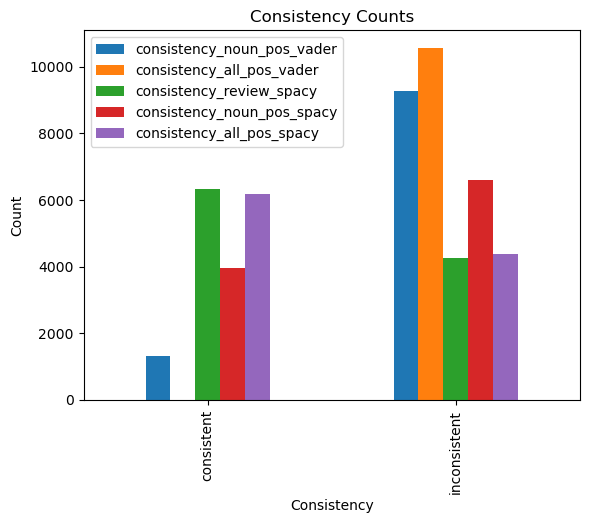

In [76]:
import matplotlib.pyplot as plt

# Count the inconsistencies
Consistency_counts = df_test[['consistency_noun_pos_vader', 'consistency_all_pos_vader', 'consistency_review_spacy', 'consistency_noun_pos_spacy', 'consistency_all_pos_spacy']].apply(pd.value_counts)

# Plot the inconsistencies
Consistency_counts.plot(kind='bar')
plt.xlabel('Consistency')
plt.ylabel('Count')
plt.title('Consistency Counts')
plt.show()


## Calculate the accuracy rate of each sentiment analysis method 

consistent / column count: 
Columns inclduing: 'consistency_noun_pos_vader', 'consistency_all_pos_vader', 'consistency_review_spacy', 'consistency_noun_pos_spacy', 'consistency_all_pos_spacy'

In [81]:
# Calculate the accuracy rate
accuracy_rates = {
    'consistency_noun_pos_vader': df_test['consistency_noun_pos_vader'].value_counts().get('consistent', 0) / len(df_test),
    'consistency_all_pos_vader': df_test['consistency_all_pos_vader'].value_counts().get('consistent', 0) / len(df_test),
    'consistency_review_spacy': df_test['consistency_review_spacy'].value_counts().get('consistent', 0) / len(df_test),
    'consistency_noun_pos_spacy': df_test['consistency_noun_pos_spacy'].value_counts().get('consistent', 0) / len(df_test),
    'consistency_all_pos_spacy': df_test['consistency_all_pos_spacy'].value_counts().get('consistent', 0) / len(df_test)
}

# Create a dataframe from the accuracy rates
accuracy_df = pd.DataFrame.from_dict(accuracy_rates, orient='index', columns=['Accuracy Rate'])

# Sort the dataframe in descending order
accuracy_df = accuracy_df.sort_values(by='Accuracy Rate', ascending=False)

accuracy_df


,Accuracy Rate
consistency_review_spacy,0.597766
consistency_all_pos_spacy,0.585936
consistency_noun_pos_spacy,0.374219
consistency_noun_pos_vader,0.123225
consistency_all_pos_vader,0.000000


# Review + SpaCy Plots

/var/folders/tr/psvn_y8x0w34ssccnb237zq00000gn/T/ipykernel_3719/2863844937.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='cluster', y='sentiment_score_review_spacy', ax=axes[0], palette=colors)
/Users/kellyliu/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kellyliu/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/kellyliu/anaconda3/lib/python3.11/site-packages/seabor

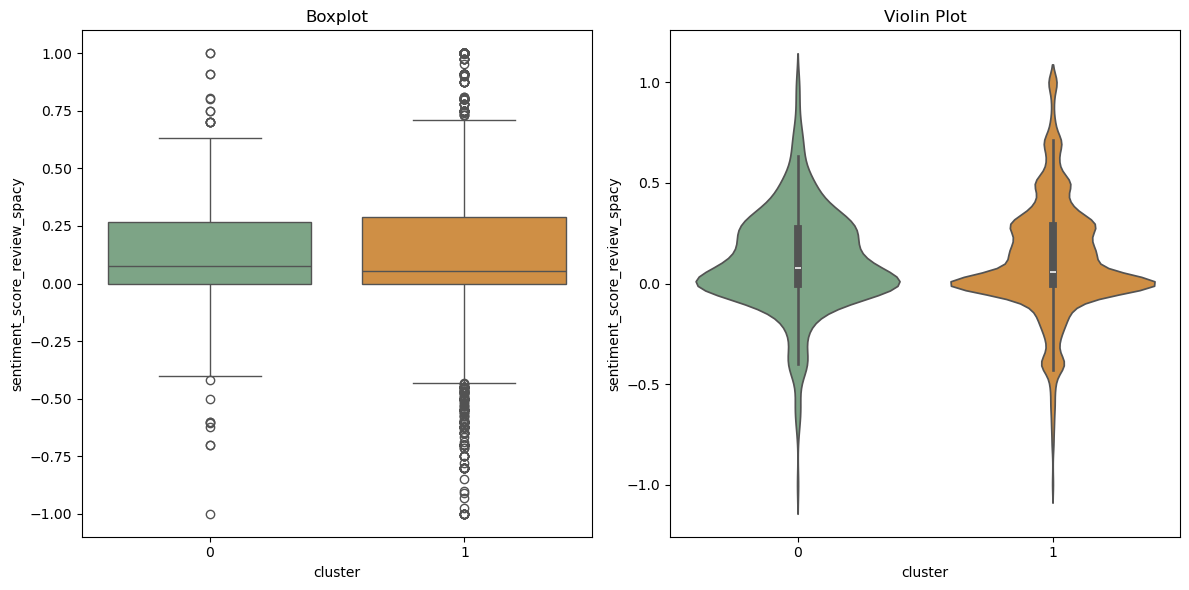

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the colors for the segments
colors = ['#77aa83', '#e6902e']

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
sns.boxplot(data=df_test, x='cluster', y='sentiment_score_review_spacy', ax=axes[0], palette=colors)
axes[0].set_title('Boxplot')

# Violin plot
sns.violinplot(data=df_test, x='cluster', y='sentiment_score_review_spacy', ax=axes[1], palette=colors)
axes[1].set_title('Violin Plot')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


# All POS + SpaCy Plots

/var/folders/tr/psvn_y8x0w34ssccnb237zq00000gn/T/ipykernel_3719/4171637881.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_test, x='cluster', y='sentiment_score_all_pos_spacy', ax=axes[0], palette=colors)
/Users/kellyliu/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kellyliu/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/kellyliu/anaconda3/lib/python3.11/site-packages/seabo

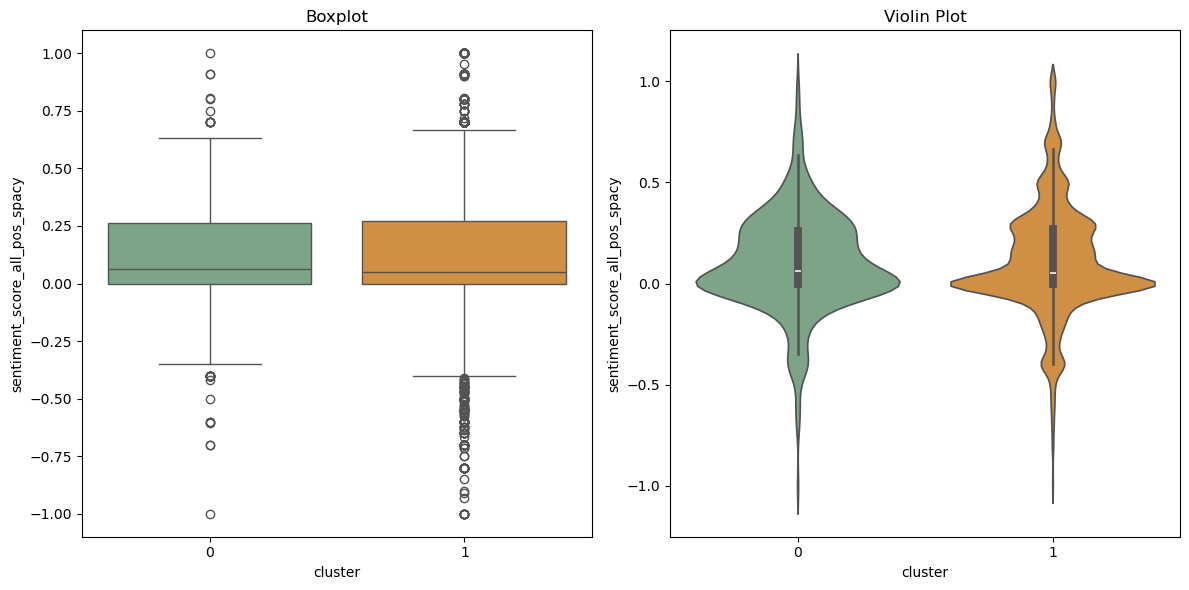

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the colors for the segments
colors = ['#77aa83', '#e6902e']

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot
sns.boxplot(data=df_test, x='cluster', y='sentiment_score_all_pos_spacy', ax=axes[0], palette=colors)
axes[0].set_title('Boxplot')

# Violin plot
sns.violinplot(data=df_test, x='cluster', y='sentiment_score_all_pos_spacy', ax=axes[1], palette=colors)
axes[1].set_title('Violin Plot')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
df.to_csv('Vader vs. Spacy Sentiments Scores.csv', index=False)


In [ ]:
# Split the CSV into two segments based on the cluster column
segment_0 = df[df['cluster'] == 0]
segment_1 = df[df['cluster'] == 1]

# Output the segments as separate CSV files
segment_0.to_csv('segment_0.csv', index=False)
segment_1.to_csv('segment_1.csv', index=False)
